In [1]:
import pandas as pd
import numpy as np
import re
import math
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Data Overview

In [2]:
df = pd.read_csv('weather_prediction_dataset.csv')
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [3]:
print(df.columns)

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)



Cities:
['BASEL', 'BUDAPEST', 'DE_BILT', 'DRESDEN', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MALMO', 'MONTELIMAR', 'MUENCHEN', 'OSLO', 'PERPIGNAN', 'ROMA', 'SONNBLICK', 'STOCKHOLM', 'TOURS']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

City Variable pairs:
['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_max', 'DE_BILT_cloud_cover', 'DE_BILT_wind_speed', 'DE_BILT_wind_gust', 'DE_BILT_humidity', 'DE_BILT_pressure', 'DE_BILT_global_radiation', 'DE_BILT_precipitation', 'DE_BILT_sunshine', 'DE_BILT_temp_mean

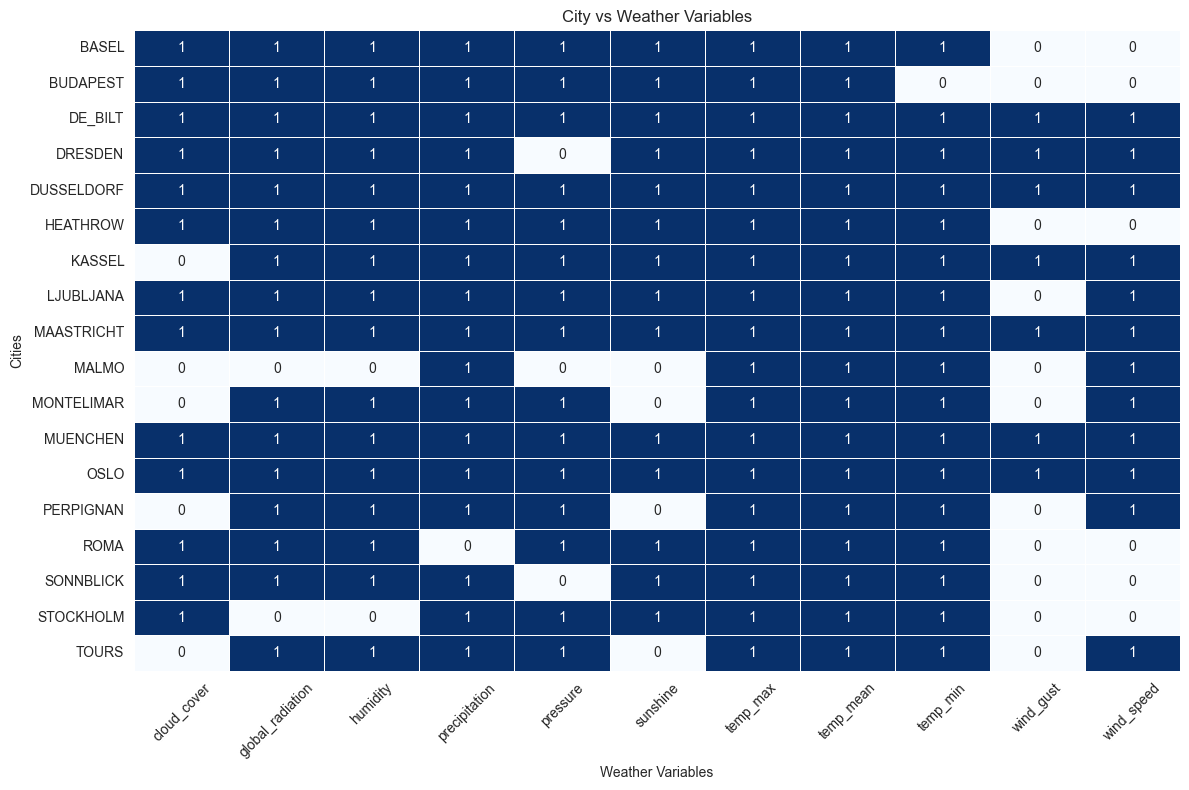

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Weather Variables:
['cloud_cover', 'global_radiation', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'wind_gust', 'wind_speed']


In [4]:
# List of cities
cities = ['BASEL', 'BUDAPEST', 'DE_BILT', 'DRESDEN', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 
          'LJUBLJANA', 'MAASTRICHT', 'MALMO', 'MONTELIMAR', 'MUENCHEN', 'OSLO', 'PERPIGNAN', 
          'ROMA', 'SONNBLICK', 'STOCKHOLM', 'TOURS']

valid_value_vars = [col for col in df.columns if any(col.startswith(city) for city in cities)]

# Printing Unique Cities
print("\nCities:")
print(sorted(cities))

# Printing City-Variable Pairs
print(50 * "----")
print("\nCity Variable pairs:")
print(valid_value_vars)

variables = set()
print(50 * "----")

# Create a dictionary to store city and its variables
city_variable_dict = {}

# Extract weather variables based on city names
for city in cities:
    found_variables = [col.split(city + "_")[1] for col in valid_value_vars if col.startswith(city + "_")]
    variables.update(set(found_variables))
    city_variable_dict[city] = found_variables
    print(f"City: {city}, Found Variables: {found_variables}")

# Convert variables set to sorted list
variable_list = sorted(variables)

# Create a DataFrame where cities are rows and variables are columns, populated with 0/1
data_matrix = pd.DataFrame(0, index=cities, columns=variable_list)

# Fill the DataFrame with 1 where the city has that variable
for city, var_list in city_variable_dict.items():
    for var in var_list:
        data_matrix.loc[city, var] = 1

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_matrix, annot=True, cmap="Blues", cbar=False, linewidths=0.5)
plt.title('City vs Weather Variables')
plt.xlabel('Weather Variables')
plt.ylabel('Cities')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print(50*"----")
print("\nWeather Variables:")
print(sorted(variables))


In [5]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data

Series([], dtype: int64)

As have a large number of cities, and the goal is to build a generalizable model a more compact and scalable feature space is preferred. 
Efficient Feature Space: The number of features remains consistent regardless of the number of cities, keeping the model simpler.

Generalization: The model can generalize better since the structure remains constant, and the city is just one more feature.

Easier to Scale: This approach is more efficient when you have many cities or want to scale the model to new cities.

Supports Categorical Encoding: You can easily encode the city column as a categorical feature (e.g., using one-hot encoding or embeddings) without expanding the feature space too much.

Compact Feature Space: Instead of creating many columns (one for each city-variable combination), you only need one set of columns for the weather variables, significantly reducing dimensionality.

Efficient for Model Training: You avoid the curse of dimensionality and make the dataset much more efficient for machine learning models. You can encode the city as a categorical variable using methods like one-hot encoding or embeddings.

Scalable: This format is more flexible if you plan to add more cities or extend the time range.

### Data Reshaping

In [6]:
# Define the list of cities
cities = ['BASEL', 'BUDAPEST', 'DE_BILT', 'DRESDEN', 'DUSSELDORF', 'HEATHROW', 'KASSEL',
          'LJUBLJANA', 'MAASTRICHT', 'MALMO', 'MONTELIMAR', 'MUENCHEN', 'OSLO', 'PERPIGNAN',
          'ROMA', 'SONNBLICK', 'STOCKHOLM', 'TOURS']

# Define the list of weather variables
weather_variables = ['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation',
                     'sunshine', 'temp_mean', 'temp_min', 'temp_max', 'wind_speed', 'wind_gust']

# Function to extract city and variable correctly even if city names have underscores
def extract_city_and_variable(col_name):
    for city in cities:
        if col_name.startswith(city):
            return city, col_name[len(city)+1:]  # Extract city and variable
    return None, None

# Get a list of city-variable columns
valid_value_vars = [col for col in df.columns if any(col.startswith(city) for city in cities)]

# Reshape the dataframe to long format
long_format_df = pd.melt(
    df,
    id_vars=['DATE', 'MONTH'],  # Keep DATE and MONTH columns as they are
    value_vars=valid_value_vars,  # Use city-variable pairs
    var_name='city_variable',  # Temporary column for city-variable combined names
    value_name='value'  # Column for the values
)

# Split the 'city_variable' into 'city' and 'variable' using the custom function
long_format_df[['city', 'variable']] = long_format_df['city_variable'].apply(lambda x: extract_city_and_variable(x)).apply(pd.Series)

# Drop the 'city_variable' column since it's no longer needed
long_format_df.drop(columns=['city_variable'], inplace=True)

# Pivot the table to get the final reshaped format
reshaped_df = long_format_df.pivot_table(index=['DATE', 'MONTH', 'city'], columns='variable', values='value').reset_index()

reshaped_df.to_csv('reshaped_weather_prediction_dataset.csv', index=False)

In [7]:
df = pd.read_csv('reshaped_weather_prediction_dataset.csv')
df.head()

,DATE,MONTH,city,cloud_cover,global_radiation,humidity,precipitation,pressure,sunshine,temp_max,temp_mean,temp_min,wind_gust,wind_speed
0,20000101,1,BASEL,8.0,0.20,0.89,0.03,1.0286,0.0,3.9,2.9,1.6,NaN,NaN
1,20000101,1,BUDAPEST,3.0,0.52,0.92,0.00,1.0268,3.7,-0.7,-4.9,NaN,NaN,NaN
2,20000101,1,DE_BILT,7.0,0.11,0.97,0.10,1.0240,0.0,8.1,6.1,3.5,8.0,2.5
3,20000101,1,DRESDEN,8.0,0.09,0.89,0.32,NaN,0.0,2.0,1.0,-1.8,7.2,3.2
4,20000101,1,DUSSELDORF,8.0,0.12,0.92,0.22,1.0240,0.0,6.9,4.2,2.5,5.9,2.5


## Handling Missing Values

In [8]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data

cloud_cover         18270
global_radiation     7308
humidity             7308
precipitation        3654
pressure            10962
sunshine            14616
temp_min             3654
wind_gust           40194
wind_speed          21924
dtype: int64

In [9]:
missing_data_proportion = df.isnull().mean() * 100
missing_data_proportion = missing_data_proportion[missing_data_proportion > 0]
missing_data_proportion

cloud_cover         27.777778
global_radiation    11.111111
humidity            11.111111
precipitation        5.555556
pressure            16.666667
sunshine            22.222222
temp_min             5.555556
wind_gust           61.111111
wind_speed          33.333333
dtype: float64

Variables with Low Missing Data (<10%):
	•	precipitation and temp_min are the least affected by missing data.
	•	Action: Either fill in the missing values (with a suitable imputation method) or leave them as is, as the low percentage of missing data is unlikely to significantly impact model training.
	•	Imputation Options: Mean, median, or forward-fill.
	
Variables with Moderate Missing Data (10-30%):
	•	cloud_cover, global_radiation, humidity, pressure, sunshine, and wind_speed fall in this range.
	•	Action: Impute missing values for these variables using the mean or median for the corresponding city, or a forward-fill if the dataset is time-based. Another option is to use model-based imputation techniques.
	
Variables with High Missing Data (>30%):
	•	wind_gust has 61.11% missing data, making it unreliable for use in model training.
	•	Action: Given the high percentage of missing data, drop this variable from the analysis entirely, as attempting to impute such a large portion may introduce bias or noise.

In [10]:
# Drop 'wind_gust' due to high percentage of missing data
reshaped_df = reshaped_df.drop(columns=['wind_gust'])

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Step 1: Impute Variables with Low Missing Data (<10%)
# Using mean imputation for 'temp_min'
reshaped_df['temp_min'] = mean_imputer.fit_transform(reshaped_df[['temp_min']])

# Using constant imputation (0) for 'precipitation'
reshaped_df['precipitation'] = constant_imputer.fit_transform(reshaped_df[['precipitation']])

# Step 2: Impute Variables with Moderate Missing Data (10-30%)
# Using mean imputation for the following variables
moderate_missing_columns = ['cloud_cover', 'global_radiation', 'humidity', 'pressure', 'sunshine', 'wind_speed']
# Apply mean imputation for these columns
reshaped_df[moderate_missing_columns] = mean_imputer.fit_transform(reshaped_df[moderate_missing_columns])

reshaped_df.to_csv('reshaped_weather_prediction_dataset.csv', index=False)

## Data Overview

In [11]:
reshaped_df = pd.read_csv('reshaped_weather_prediction_dataset.csv')
reshaped_df

,DATE,MONTH,city,cloud_cover,global_radiation,humidity,precipitation,pressure,sunshine,temp_max,temp_mean,temp_min,wind_speed
0,20000101,1,BASEL,8.000000,0.200000,0.890000,0.03,1.028600,0.000000,3.9,2.9,1.600000,3.333559
1,20000101,1,BUDAPEST,3.000000,0.520000,0.920000,0.00,1.026800,3.700000,-0.7,-4.9,6.329399,3.333559
2,20000101,1,DE_BILT,7.000000,0.110000,0.970000,0.10,1.024000,0.000000,8.1,6.1,3.500000,2.500000
3,20000101,1,DRESDEN,8.000000,0.090000,0.890000,0.32,1.015801,0.000000,2.0,1.0,-1.800000,3.200000
4,20000101,1,DUSSELDORF,8.000000,0.120000,0.920000,0.22,1.024000,0.000000,6.9,4.2,2.500000,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65767,20100101,1,PERPIGNAN,5.134352,0.620000,0.520000,0.00,1.001000,5.011234,12.7,11.0,9.300000,9.600000
65768,20100101,1,ROMA,3.000000,1.560000,0.730000,0.00,1.015200,7.100000,11.2,16.0,9.900000,3.333559
65769,20100101,1,SONNBLICK,5.000000,0.660000,0.890000,0.56,1.015801,5.600000,-7.9,-9.7,-11.500000,3.333559
65770,20100101,1,STOCKHOLM,6.000000,1.365636,0.749453,0.07,1.006800,1.500000,-7.0,-7.6,-8.800000,3.333559


In [12]:
missing_data = reshaped_df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data

Series([], dtype: int64)

In [13]:
# Convert 'DATE' column from int64 to datetime format
reshaped_df['date'] = pd.to_datetime(reshaped_df['DATE'], format='%Y%m%d')

# Extract year, month, day components (if needed)
reshaped_df['year'] = reshaped_df['date'].dt.year
reshaped_df['month'] = reshaped_df['date'].dt.month  # You already have a 'MONTH' column, so this may be redundant
reshaped_df['day'] = reshaped_df['date'].dt.day  # Optional if you want the day component

# Drop the original 'DATE' column if it's no longer needed
reshaped_df.drop(columns=['DATE', 'MONTH'], inplace=True)
reshaped_df.head()

,city,cloud_cover,global_radiation,humidity,precipitation,pressure,sunshine,temp_max,temp_mean,temp_min,wind_speed,date,year,month,day
0,BASEL,8.0,0.20,0.89,0.03,1.028600,0.0,3.9,2.9,1.600000,3.333559,2000-01-01,2000,1,1
1,BUDAPEST,3.0,0.52,0.92,0.00,1.026800,3.7,-0.7,-4.9,6.329399,3.333559,2000-01-01,2000,1,1
2,DE_BILT,7.0,0.11,0.97,0.10,1.024000,0.0,8.1,6.1,3.500000,2.500000,2000-01-01,2000,1,1
3,DRESDEN,8.0,0.09,0.89,0.32,1.015801,0.0,2.0,1.0,-1.800000,3.200000,2000-01-01,2000,1,1
4,DUSSELDORF,8.0,0.12,0.92,0.22,1.024000,0.0,6.9,4.2,2.500000,2.500000,2000-01-01,2000,1,1


In [14]:
reshaped_df.describe()

,cloud_cover,global_radiation,humidity,precipitation,pressure,sunshine,temp_max,temp_mean,temp_min,wind_speed,date,year,month,day
count,65772.000000,65772.000000,65772.000000,65772.00000,65772.000000,65772.000000,65772.000000,65772.000000,65772.000000,65772.000000,65772,65772.000000,65772.000000,65772.000000
mean,5.134352,1.365636,0.749453,0.21775,1.015801,5.011234,14.502664,10.387741,6.329399,3.333559,2004-12-31 12:00:00,2004.501095,6.520799,15.727422
min,-99.000000,0.010000,0.100000,0.00000,-0.099000,-1.700000,-24.700000,-26.600000,-30.300000,0.000000,2000-01-01 00:00:00,2000.000000,1.000000,1.000000
25%,4.000000,0.600000,0.670000,0.00000,1.012200,1.500000,7.700000,4.600000,1.600000,2.400000,2002-07-02 00:00:00,2002.000000,4.000000,8.000000
50%,5.134352,1.365636,0.749453,0.00000,1.015801,5.011234,15.000000,10.900000,6.329399,3.333559,2004-12-31 12:00:00,2004.500000,7.000000,16.000000
75%,7.000000,1.990000,0.850000,0.17000,1.020200,7.300000,21.600000,16.600000,11.700000,3.500000,2007-07-03 00:00:00,2007.000000,10.000000,23.000000
max,9.000000,4.420000,1.000000,16.04000,1.051200,24.000000,41.100000,33.100000,26.300000,16.300000,2010-01-01 00:00:00,2010.000000,12.000000,31.000000
std,2.060933,0.898143,0.131262,0.56305,0.011927,3.904632,9.577590,8.407782,7.365724,1.540400,NaN,2.873732,3.449637,8.803095


In [15]:
reshaped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65772 entries, 0 to 65771
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   city              65772 non-null  object        
 1   cloud_cover       65772 non-null  float64       
 2   global_radiation  65772 non-null  float64       
 3   humidity          65772 non-null  float64       
 4   precipitation     65772 non-null  float64       
 5   pressure          65772 non-null  float64       
 6   sunshine          65772 non-null  float64       
 7   temp_max          65772 non-null  float64       
 8   temp_mean         65772 non-null  float64       
 9   temp_min          65772 non-null  float64       
 10  wind_speed        65772 non-null  float64       
 11  date              65772 non-null  datetime64[ns]
 12  year              65772 non-null  int32         
 13  month             65772 non-null  int32         
 14  day               6577

In [16]:
reshaped_df.dtypes

city                        object
cloud_cover                float64
global_radiation           float64
humidity                   float64
precipitation              float64
pressure                   float64
sunshine                   float64
temp_max                   float64
temp_mean                  float64
temp_min                   float64
wind_speed                 float64
date                datetime64[ns]
year                         int32
month                        int32
day                          int32
dtype: object

## Feature Distribution and Univariate Analysis

In [17]:
categorical_features = reshaped_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = reshaped_df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Features:")
print(categorical_features)

print("\nDistinct values for each categorical feature:")
for feature in categorical_features:
    distinct_values = reshaped_df[feature].nunique()
    unique_values = reshaped_df[feature].unique()
    print(f"{feature}: {distinct_values} unique values")
    print(f"Values: {unique_values}")

print("\nNumerical Features:")
print(numerical_features)

Categorical Features:
['city']

Distinct values for each categorical feature:
city: 18 unique values
Values: ['BASEL' 'BUDAPEST' 'DE_BILT' 'DRESDEN' 'DUSSELDORF' 'HEATHROW' 'KASSEL'
 'LJUBLJANA' 'MAASTRICHT' 'MALMO' 'MONTELIMAR' 'MUENCHEN' 'OSLO'
 'PERPIGNAN' 'ROMA' 'SONNBLICK' 'STOCKHOLM' 'TOURS']

Numerical Features:
['cloud_cover', 'global_radiation', 'humidity', 'precipitation', 'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 'wind_speed', 'year', 'month', 'day']


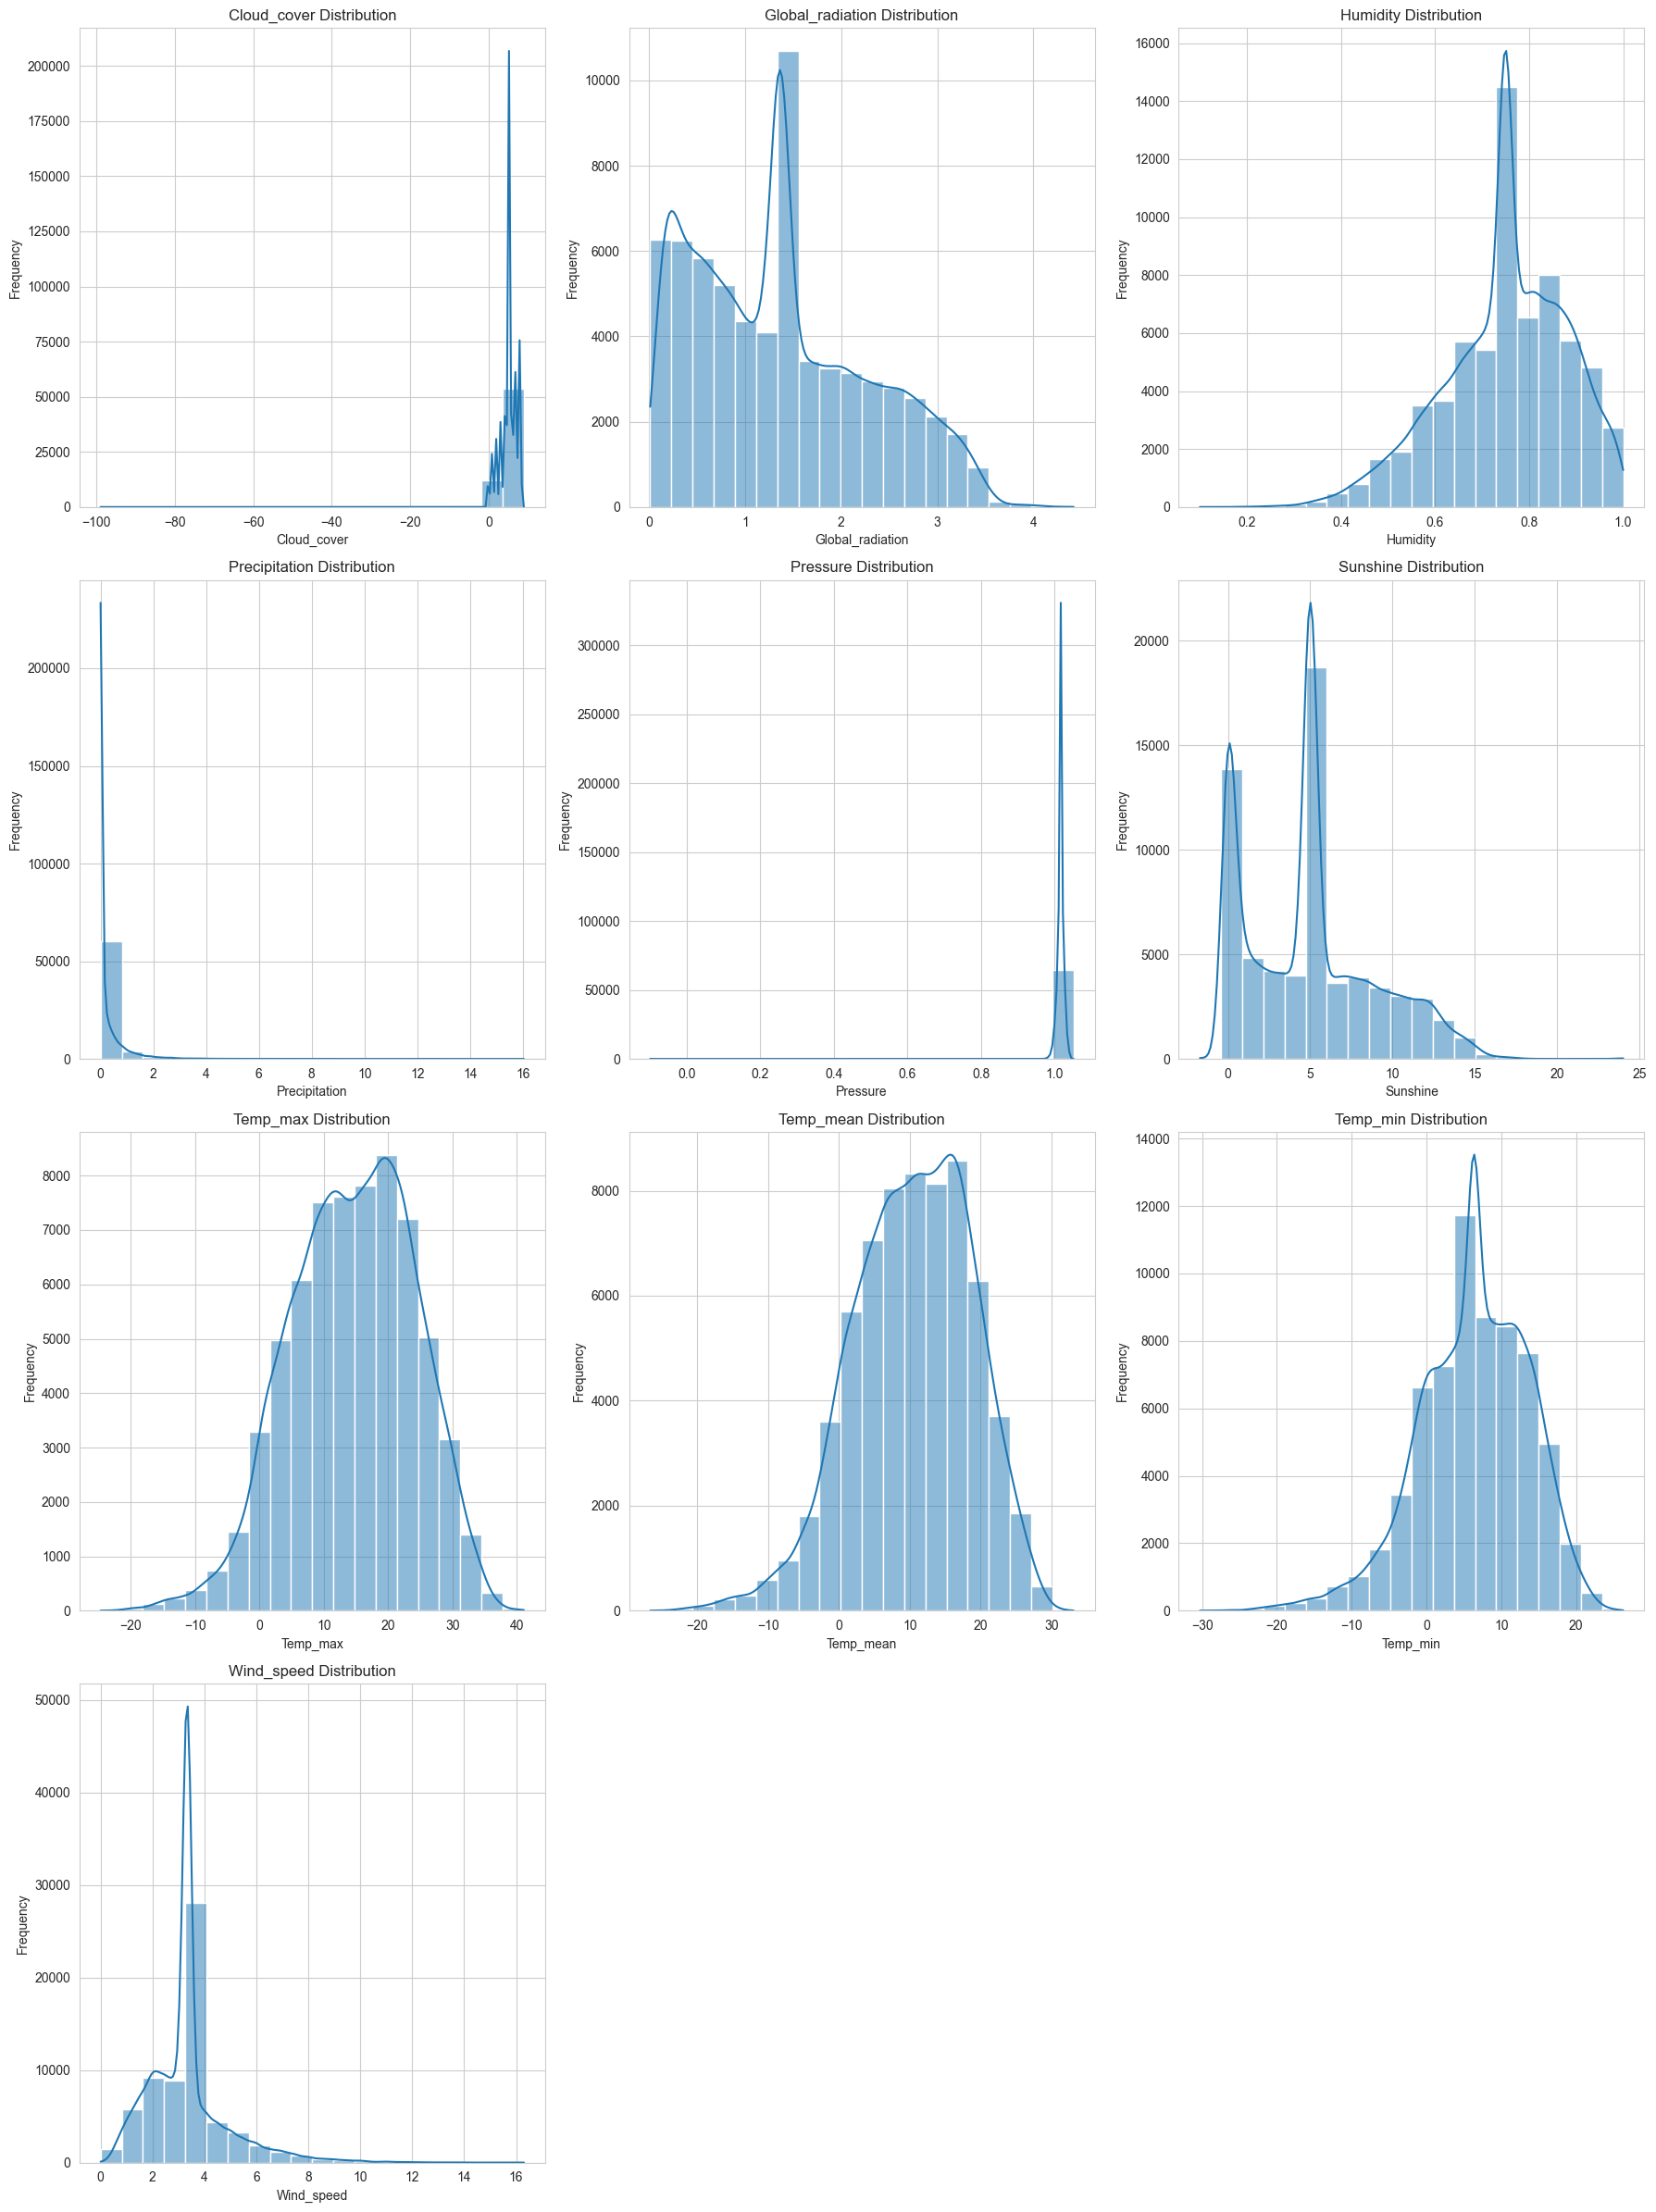

In [18]:
numerical_features = ['cloud_cover', 'global_radiation', 'humidity', 'precipitation', 
                      'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 
                      'wind_speed']

# Calculate the number of rows and columns needed based on the number of features
num_features = len(numerical_features)
cols = 3  # Number of columns you want in the grid
rows = math.ceil(num_features / cols)  # Dynamically calculate the number of rows

# Create a figure with dynamic subplot grid
fig, axs = plt.subplots(rows, cols, figsize=(18, 6 * rows))

# Flatten axs to make it easier to iterate over if there are multiple rows
axs = axs.flatten()

# Loop through each numerical feature and create a histogram with KDE plot
for i, feature in enumerate(numerical_features):
    sns.histplot(reshaped_df[feature], bins=20, kde=True, ax=axs[i])
    axs[i].set_title(f'{feature.capitalize()} Distribution')
    axs[i].set_xlabel(feature.capitalize())
    axs[i].set_ylabel('Frequency')

# Remove any empty subplots if the number of features doesn't perfectly fill the grid
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust the layout for clarity
plt.tight_layout()

# Show the plots
plt.show()

In [19]:
numerical_features = ['cloud_cover', 'global_radiation', 'humidity', 'precipitation', 
                      'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 
                      'wind_speed']
skewness = reshaped_df[numerical_features].skew()
print("Skewness of features:\n", skewness)

Skewness of features:
 cloud_cover         -4.491481
global_radiation     0.501186
humidity            -0.529805
precipitation        6.691842
pressure           -46.756824
sunshine             0.579798
temp_max            -0.254646
temp_mean           -0.379185
temp_min            -0.537140
wind_speed           1.513328
dtype: float64


Highly Skewed Features:
	•	cloud_cover, precipitation, pressure, and wind_speed are highly skewed, which could impact the performance of regression models like Linear Regression. These should be the focus for transformation.

Moderate Skewness:
	•	global_radiation, humidity, sunshine, and temp_min may still benefit from some transformation, but their skewness is less extreme.

In [20]:
import numpy as np
from scipy.stats import boxcox

# Log transformation for positively skewed features
reshaped_df['precipitation'] = reshaped_df['precipitation'].apply(lambda x: np.log1p(x))
reshaped_df['wind_speed'] = reshaped_df['wind_speed'].apply(lambda x: np.log1p(x))

# Reflection log transformation for negatively skewed features
reshaped_df['cloud_cover'] = reshaped_df['cloud_cover'].apply(lambda x: np.log1p(-x) if x < 0 else x)
reshaped_df['pressure'] = reshaped_df['pressure'].apply(lambda x: np.log1p(-x) if x < 0 else x)

# Box-Cox transformation for moderately skewed features
reshaped_df['global_radiation'], _ = boxcox(reshaped_df['global_radiation'] + 1)
reshaped_df['humidity'], _ = boxcox(reshaped_df['humidity'] + 1)

# Check skewness after transformations
new_skewness = reshaped_df[numerical_features].skew()
print("New skewness after transformation:\n", new_skewness)

New skewness after transformation:
 cloud_cover         -0.646711
global_radiation    -0.016922
humidity            -0.037626
precipitation        2.702349
pressure           -37.397820
sunshine             0.579798
temp_max            -0.254646
temp_mean           -0.379185
temp_min            -0.537140
wind_speed          -0.171251
dtype: float64


precipitation: Skewness improved from 6.69 to 2.70, but it is still quite skewed. Precipitation often exhibits this kind of skewness due to the nature of weather data (many days with zero precipitation). Apply further log transformations to reduce skewness.

pressure: Skewness improved slightly, but it is still highly skewed at -37.40. This indicates that the extreme skewness is likely caused by outliers or measurement issues. Remove outliers: Use the Interquartile Range (IQR) method or z-scores to detect and remove extreme outliers.

In [21]:
reshaped_df['precipitation'] = reshaped_df['precipitation'].apply(lambda x: np.log1p(x))
# Handle outliers in pressure using IQR (Interquartile Range)
Q1 = reshaped_df['pressure'].quantile(0.25)
Q3 = reshaped_df['pressure'].quantile(0.75)
IQR = Q3 - Q1

# Define the limits to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap pressure values to remove extreme outliers
reshaped_df['pressure'] = reshaped_df['pressure'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
new_skewness = reshaped_df[numerical_features].skew()
print("New skewness after transformation:\n", new_skewness)

New skewness after transformation:
 cloud_cover        -0.646711
global_radiation   -0.016922
humidity           -0.037626
precipitation       2.059441
pressure           -0.057294
sunshine            0.579798
temp_max           -0.254646
temp_mean          -0.379185
temp_min           -0.537140
wind_speed         -0.171251
dtype: float64


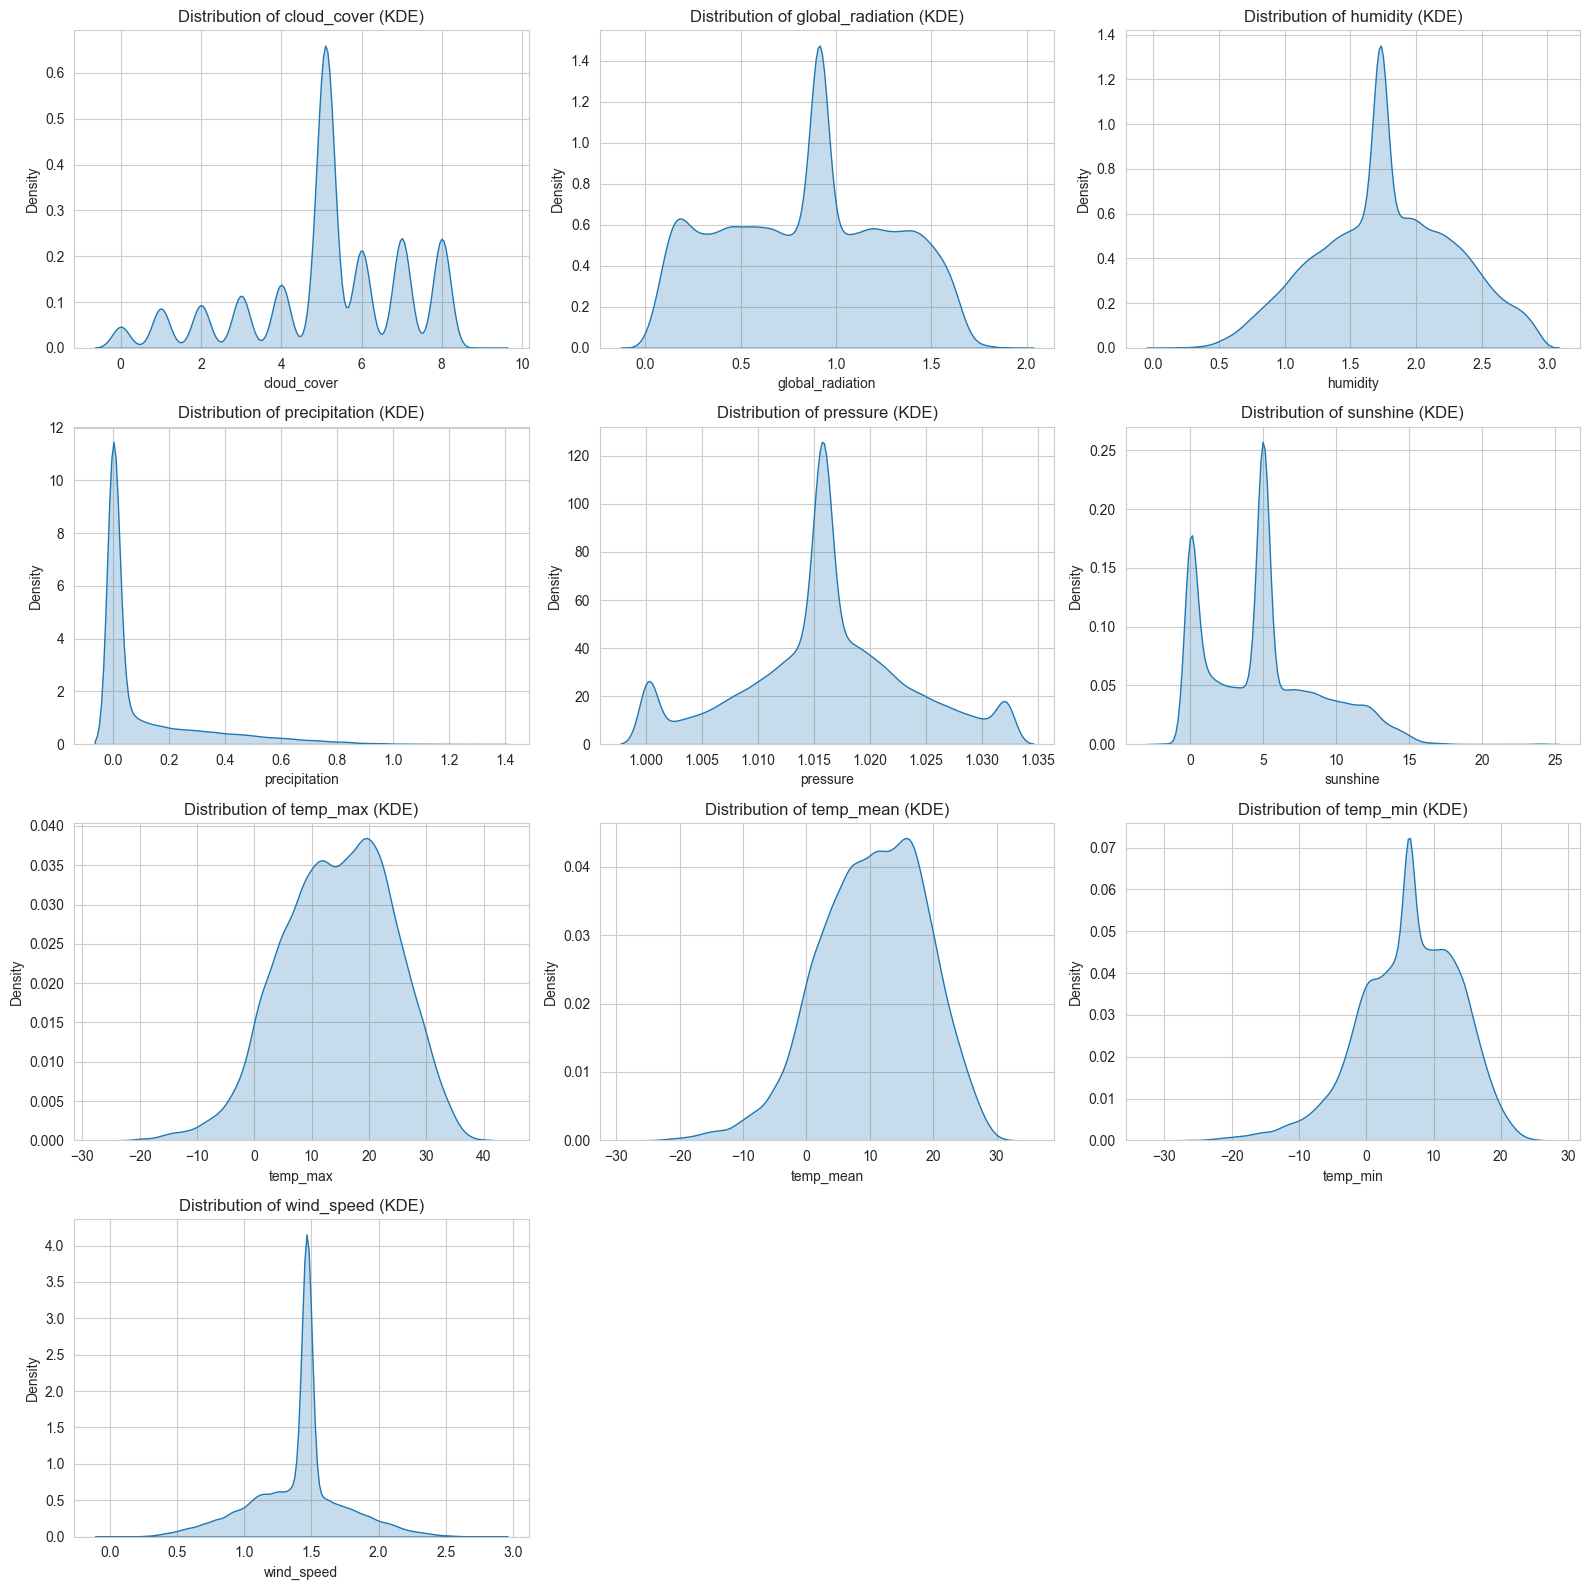

In [22]:
cols = 3  # Number of columns in the grid (you can adjust this based on your preference)
num_features = len(numerical_features)
rows = (num_features // cols) + 1 if num_features % cols != 0 else num_features // cols

plt.figure(figsize=(16, 4 * rows))  # Adjust figure size based on the number of features

# Loop through each numerical feature and plot the KDE
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(reshaped_df[feature], shade=True)
    plt.title(f'Distribution of {feature} (KDE)')
    plt.xlabel(feature)
    plt.ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

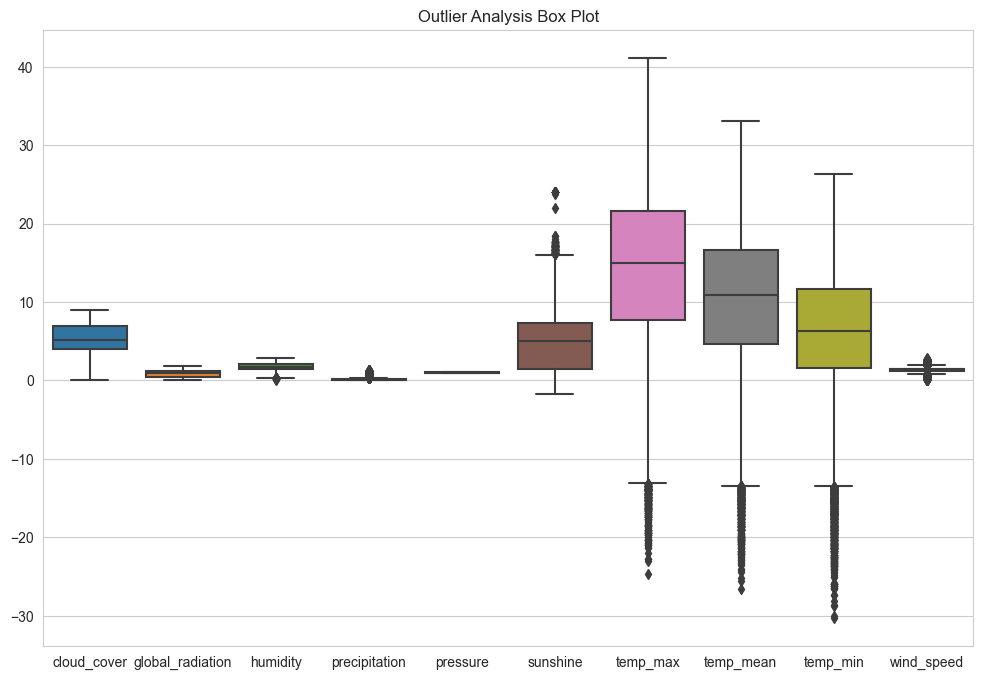

In [23]:
numerical_features = ['cloud_cover', 'global_radiation', 'humidity', 'precipitation', 
                      'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 
                      'wind_speed']
plt.figure(figsize=(12, 8))
sns.boxplot(data=reshaped_df[numerical_features])
plt.title('Outlier Analysis Box Plot')
plt.show()

In [24]:
from scipy import stats
numerical_features = ['cloud_cover', 'global_radiation', 'humidity', 'precipitation', 
                      'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 
                      'wind_speed']

def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[feature].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Dictionary to store outliers for each feature
outliers_dict = {}

# Loop through each numerical feature and detect outliers
for feature in numerical_features:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(reshaped_df, feature)
    
    # Only print information if outliers are detected
    if len(outliers) > 0:
        outliers_dict[feature] = outliers
        print(f"\nFeature: {feature}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Number of outliers detected: {len(outliers)}")
        print(outliers)


Feature: humidity
Lower Bound: 0.3251320708582386, Upper Bound: 3.261434276611232
Number of outliers detected: 29
            city  cloud_cover  global_radiation  humidity  precipitation  \
231    SONNBLICK     0.000000          0.646942  0.239138            0.0   
2966        ROMA     2.000000          1.531509  0.223894            0.0   
6135   SONNBLICK     1.000000          0.658567  0.286814            0.0   
6405   SONNBLICK     0.000000          0.670085  0.286814            0.0   
6423   SONNBLICK     0.000000          0.670085  0.320260            0.0   
6441   SONNBLICK     1.000000          0.652768  0.320260            0.0   
7395   SONNBLICK     1.000000          1.078742  0.320260            0.0   
13227  SONNBLICK     1.000000          0.670085  0.320260            0.0   
20067  SONNBLICK     2.000000          0.826282  0.286814            0.0   
25143  SONNBLICK     1.000000          1.070367  0.270594            0.0   
26925  SONNBLICK     6.000000          0.580997  

	cloud_cover: No outliers detected.
	•	global_radiation: No outliers detected.
	•	humidity: 29 outliers, mostly from SONNBLICK and PERPIGNAN.
	•	precipitation: 8114 outliers, indicating a large number of values exceeding the IQR thresholds. This is common in weather data, where precipitation has a skewed distribution.
	•	pressure: No outliers detected.
	•	sunshine: 129 outliers, mainly from STOCKHOLM and OSLO, with values exceeding 16 hours of sunlight.
	•	temp_max: 289 outliers, mostly negative values in SONNBLICK during winter months.
	•	temp_mean: 468 outliers, similar to temp_max, with very low temperatures in SONNBLICK.
	•	temp_min: 816 outliers, including very low temperatures in SONNBLICK and OSLO.
	•	wind_speed: 8398 outliers, with many high wind speeds across different cities, indicating significant variation.

Key Insights:

	1.	Precipitation: A very large number of outliers, possibly because the IQR method identifies any small non-zero precipitation as an outlier. This may not be meaningful, as precipitation often has a skewed distribution, and low to moderate values should not always be treated as outliers.
	2.	Temperature Features (temp_max, temp_mean, temp_min): A significant number of outliers in the SONNBLICK region during winter months (negative values). These may represent real extreme cold temperatures, and you should decide whether to keep or handle these based on the context.
	3.	Wind Speed: Over 8000 outliers, mostly for high wind speeds. Like precipitation, wind speed can naturally exhibit high variation, so some of these might represent actual extreme weather events.
	4.	Sunshine: The values over 16 hours seem like extreme values, particularly in STOCKHOLM, which could reflect long summer days or inaccurate data. You might cap these values at a reasonable threshold (e.g., 16 hours).
	
Precipitation and Wind Speed: Given the natural variability in these features, consider capping extreme values rather than removing them.
	•	Temperature: If the outliers represent real cold temperatures, retain them. If they seem like erroneous data points, consider capping or imputing values.
	•	Sunshine: Consider capping values above 16 hours to handle extreme outliers.

In [25]:
# Function to cap outliers at the lower and upper bounds
def cap_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[feature] = df[feature].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Apply the capping only to precipitation, humidity, and wind speed
for feature in ['humidity', 'precipitation', 'wind_speed']:
    cap_outliers_iqr(reshaped_df, feature)

# Verify the capped values
print(reshaped_df[['humidity', 'precipitation', 'wind_speed']].describe())

           humidity  precipitation    wind_speed
count  65772.000000   65772.000000  65772.000000
mean       1.775549       0.086691      1.405183
std        0.510165       0.134086      0.291610
min        0.325132       0.000000      0.803322
25%        1.426245       0.000000      1.223775
50%        1.727382       0.000000      1.466389
75%        2.160321       0.145834      1.504077
max        2.924028       0.364584      1.924530


## Target Feature Distribution and Univariate Analysis

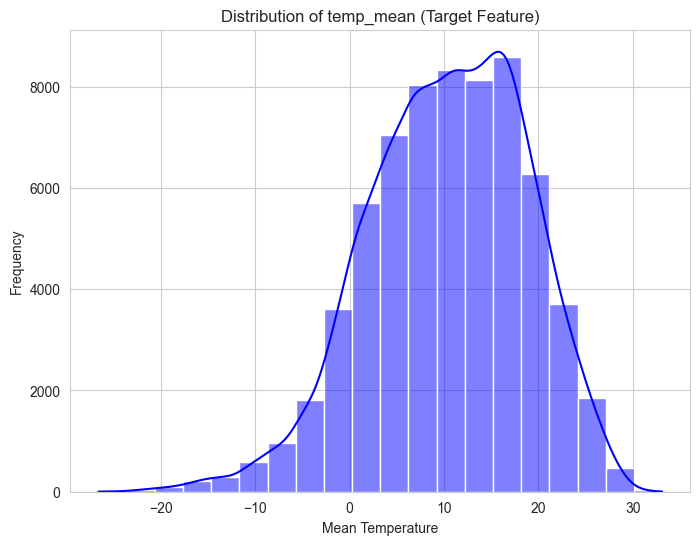

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(reshaped_df['temp_mean'], bins=20, kde=True, color='blue')
plt.title('Distribution of temp_mean (Target Feature)')
plt.xlabel('Mean Temperature')
plt.ylabel('Frequency')
plt.show()

In [28]:
from scipy.stats import skew
# Calculate the skewness of the target variable
target_skewness = skew(reshaped_df['temp_mean'])
print(f'Skewness of the target feature (temp_mean): {target_skewness}')

# Optionally, check for outliers using the IQR method (same as earlier steps)
Q1 = reshaped_df['temp_mean'].quantile(0.25)
Q3 = reshaped_df['temp_mean'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and print outliers in temp_mean
target_outliers = reshaped_df[(reshaped_df['temp_mean'] < lower_bound) | (reshaped_df['temp_mean'] > upper_bound)]
print(f'Number of outliers in temp_mean: {len(target_outliers)}')

Skewness of the target feature (temp_mean): -0.37917639332612635
Number of outliers in temp_mean: 468


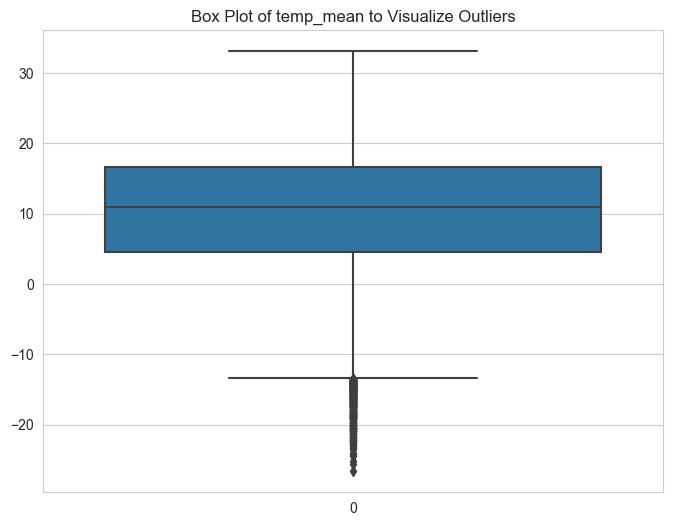

          city  cloud_cover  global_radiation  humidity  precipitation  \
15   SONNBLICK          7.0          0.623363  2.349666       0.364584   
33   SONNBLICK          5.0          0.485025  2.206717       0.284655   
195  SONNBLICK          3.0          0.675805  2.069381       0.000000   
285  SONNBLICK          1.0          0.747894  1.729579       0.000000   
339  SONNBLICK          7.0          0.517852  2.160321       0.107354   

     pressure  sunshine  temp_max  temp_mean  temp_min  wind_speed       date  \
15   1.015801       0.0     -13.4      -15.2     -17.0    1.466389 2000-01-01   
33   1.015801       2.8     -12.3      -13.7     -15.0    1.466389 2000-01-02   
195  1.015801       5.8     -13.4      -14.3     -15.1    1.466389 2000-01-11   
285  1.015801       8.7     -10.2      -13.6     -17.0    1.466389 2000-01-16   
339  1.015801       0.6     -14.1      -17.7     -21.2    1.466389 2000-01-19   

     year  month  day  
15   2000      1    1  
33   2000      1    

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(reshaped_df['temp_mean'])
plt.title('Box Plot of temp_mean to Visualize Outliers')
plt.show()

# Display the outlier rows for inspection
print(target_outliers.head())

	The box plot shows that temp_mean has several outliers on the lower end, specifically below -10°C. The valid extreme values are concentrated around the bottom, with temperatures going as low as -17°C or below.
	•	The five outlier rows you displayed all correspond to temperatures around SONNBLICK during the winter season, which might represent real extreme cold weather events rather than erroneous data.
	
Valid Extremes:
	•	Since these outliers are associated with valid extreme temperature readings from SONNBLICK in January, it’s likely that these values are correct. Therefore, removing or capping them might not be necessary

## Multivariate Analysis

### Correlation analysis between Input Features

Pearson Correlation Matrix:
                  cloud_cover  global_radiation  humidity  precipitation  \
cloud_cover          1.000000         -0.458667  0.470842       0.391793   
global_radiation    -0.458667          1.000000 -0.623163      -0.255270   
humidity             0.470842         -0.623163  1.000000       0.399711   
precipitation        0.391793         -0.255270  0.399711       1.000000   
pressure            -0.227074          0.047134 -0.077022      -0.339581   
sunshine            -0.778336          0.705062 -0.574191      -0.352739   
temp_max            -0.274764          0.591525 -0.484007      -0.158488   
temp_mean           -0.200527          0.534776 -0.434810      -0.121506   
temp_min            -0.076516          0.399921 -0.313956      -0.053404   
wind_speed           0.082799         -0.047357 -0.101480       0.098368   

                  pressure  sunshine  temp_max  temp_mean  temp_min  \
cloud_cover      -0.227074 -0.778336 -0.274764  -0.200527 -0.076

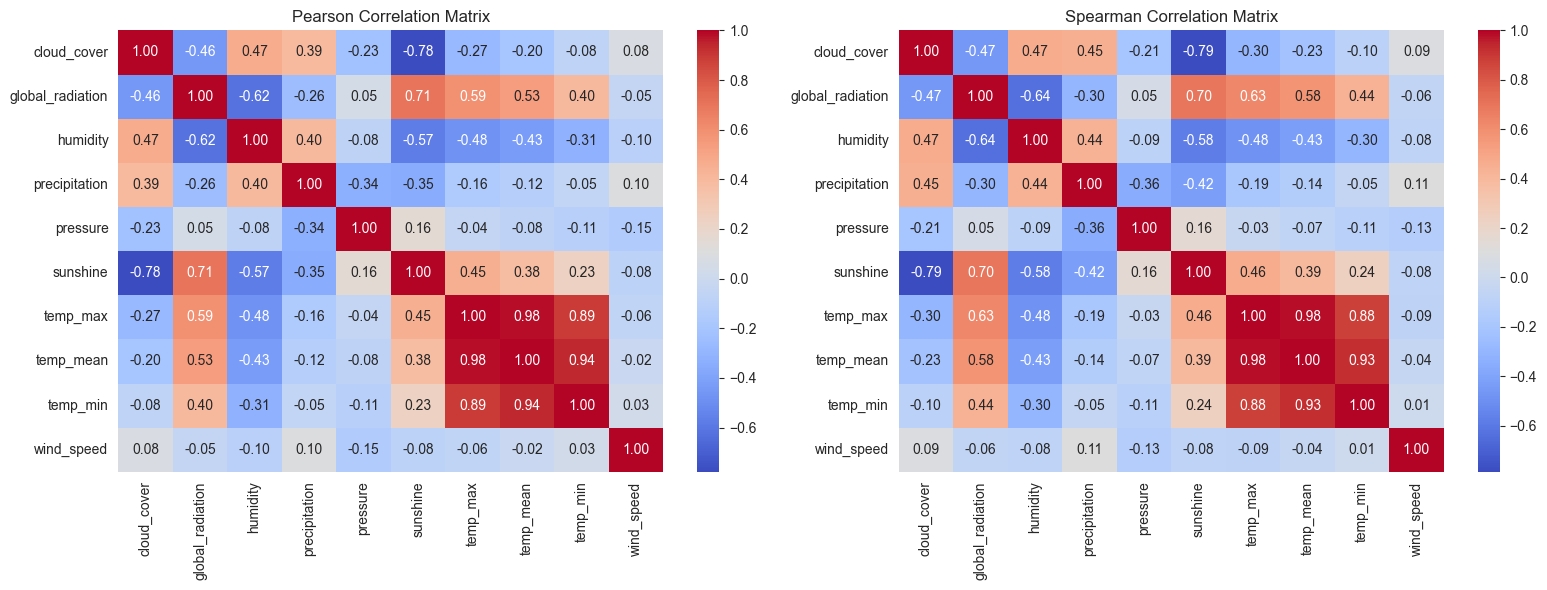

In [33]:
numerical_features = ['cloud_cover', 'global_radiation', 'humidity', 'precipitation', 
                      'pressure', 'sunshine', 'temp_max', 'temp_mean', 'temp_min', 
                      'wind_speed']
numerical_df = reshaped_df[numerical_features]
pearson_corr_matrix = numerical_df.corr(method='pearson')
spearman_corr_matrix = numerical_df.corr(method='spearman')

print("Pearson Correlation Matrix:")
print(pearson_corr_matrix)

print("\nSpearman Correlation Matrix:")
print(spearman_corr_matrix)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title('Pearson Correlation Matrix')
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()

cloud_cover and sunshine have a strong negative correlation (-0.778), which makes sense as more cloud cover generally means less sunshine.
global_radiation and humidity are negatively correlated (-0.623), implying that as global radiation (solar energy) increases, humidity decreases.
temp_max, temp_mean, and temp_min are highly correlated with each other (above 0.8), which is expected since they represent variations of the same concept (temperature).
pressure has very weak correlations with other features, suggesting it may not have a strong linear relationship with other variables in the dataset.

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Compute VIF for each feature
X = reshaped_df[numerical_features]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            Feature         VIF
0       cloud_cover   22.163674
1  global_radiation   13.536389
2          humidity   27.670117
3     precipitation    1.859443
4          pressure  124.824390
5          sunshine   11.266782
6          temp_max  172.893139
7         temp_mean  195.180356
8          temp_min   21.107582
9        wind_speed   27.730593


VIF is a measure of how much the variance of a regression coefficient is inflated due to multicollinearity among the independent variables. Typically, a VIF > 5 indicates high multicollinearity, and values above 10 are a strong indication something may be needed to address the issue.

### Correlation analysis between Input Features and Target Feature

Pearson Correlation with Target (temp_mean):
cloud_cover        -0.200527
global_radiation    0.534776
humidity           -0.434810
precipitation      -0.121506
pressure           -0.078911
sunshine            0.380220
temp_max            0.983516
temp_min            0.938860
wind_speed         -0.017529
Name: temp_mean, dtype: float64

Spearman Correlation with Target (temp_mean):
cloud_cover        -0.227951
global_radiation    0.578174
humidity           -0.430371
precipitation      -0.142389
pressure           -0.072004
sunshine            0.392903
temp_max            0.982074
temp_min            0.930083
wind_speed         -0.041706
Name: temp_mean, dtype: float64


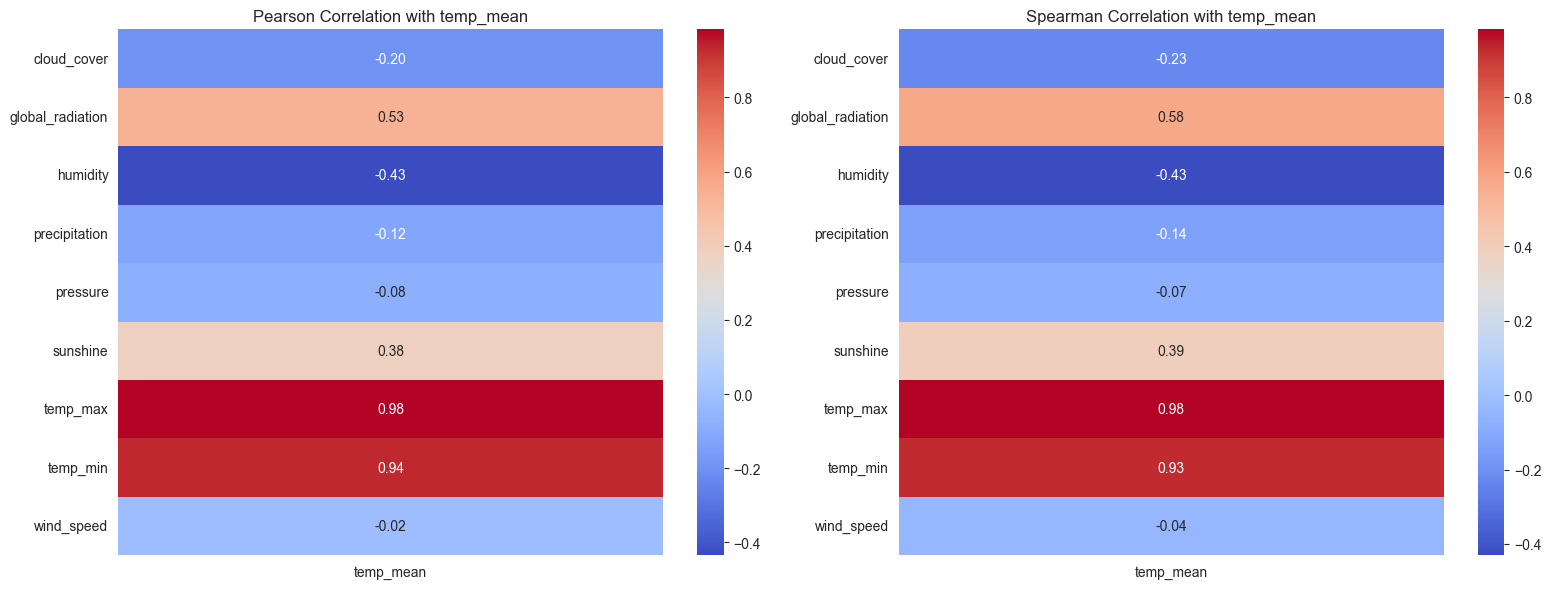

In [36]:
# Define the numerical features and the target feature
numerical_features = ['cloud_cover', 'global_radiation', 'humidity', 'precipitation', 
                      'pressure', 'sunshine', 'temp_max', 'temp_min', 'wind_speed']

# Include the target feature in the DataFrame
numerical_df = reshaped_df[numerical_features + ['temp_mean']]

# Compute Pearson and Spearman correlations with the target (temp_mean)
pearson_corr_with_target = numerical_df.corr(method='pearson')['temp_mean'].drop('temp_mean')
spearman_corr_with_target = numerical_df.corr(method='spearman')['temp_mean'].drop('temp_mean')

# Print the Pearson and Spearman correlation values
print("Pearson Correlation with Target (temp_mean):")
print(pearson_corr_with_target)

print("\nSpearman Correlation with Target (temp_mean):")
print(spearman_corr_with_target)

# Plotting the correlations with the target in a heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pearson Correlation Heatmap
sns.heatmap(pearson_corr_with_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title('Pearson Correlation with temp_mean')

# Spearman Correlation Heatmap
sns.heatmap(spearman_corr_with_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Spearman Correlation with temp_mean')

plt.tight_layout()
plt.show()

Insights:
Strong Predictors:
temp_max and temp_min have extremely high correlations with temp_mean, as expected, since they represent the boundaries of temperature.
global_radiation and sunshine are good predictors of temperature, as they relate to the amount of solar energy received.

Less Significant Predictors:
wind_speed, pressure, and precipitation have very weak correlations with temp_mean, suggesting that they are less important for predicting mean temperature.

### Feature Selection

Remove redundant features like temp_max and temp_min since they are highly correlated with temp_mean.

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

reshaped_df = reshaped_df.drop(columns=['temp_max', 'temp_min'])
selected_features = ['global_radiation', 'humidity', 'sunshine', 'cloud_cover', 'precipitation', 'pressure', 'wind_speed']

Selected Features:  [ True  True False False  True  True  True]


 Feature Importance from Tree-based Models

In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(reshaped_df[selected_features], reshaped_df['temp_mean'])
feature_importance = pd.Series(model.feature_importances_, index=selected_features)
print(feature_importance.sort_values(ascending=False))

global_radiation    0.388009
humidity            0.185770
pressure            0.160350
sunshine            0.092839
wind_speed          0.092109
cloud_cover         0.042925
precipitation       0.037999
dtype: float64


global_radiation, humidity, and pressure are the most important features, contributing significantly to the prediction of mean temperature.